# **0.0 Imports**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
from sqlalchemy.log import echo_property
from sqlalchemy.sql.expression import false
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

In [45]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [16, 9]
    plt.rcParams['font.size'] = 24
    
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## **0.1 Load Dataset**

In [2]:
#create a connection
db = create_engine ('sqlite:///C:\\Users\\victo\\Music\\Projetos\\db_olist.sqlite', echo = False)
conn = db.connect()


#Query
df_qry = """
    SELECT *
    FROM customers c 
    left join orders o on o.customer_id  = c.customer_id 
    left join order_review or2 on o.order_id  = or2.order_id 
    left join payments p  on p.order_id = o.order_id 
    left join order_items oi  on oi.order_id = o.order_id 
    left join products p2 on oi.product_id = p2.product_id 
"""


#Get data from query
data = pd.read_sql(df_qry, conn)

# **1.0 Data Description**

In [3]:
df1 = data.copy()
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,21.88,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,46.48,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.79,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,23.36,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,22.25,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


## **1.1  Data Dimensions**

In [4]:
print('Number of rows:', format(df1.shape[0]))
print('Number of columns:', format(df1.shape[1]))

Number of rows: 119151
Number of columns: 41


## **1.2 Data types**

In [5]:
df1.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
order_id                          object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
order_id                          object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value   

## **1.3 Check NA**


In [6]:
df1.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                             0
order_id                              0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
order_id                              3
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3


## **1.4 DropNA**

In [7]:
#df1 = df1.drop(columns = ['review_comment_title', 'review_comment_message'])
df1.fillna(0)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,21.88,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,46.48,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.79,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,23.36,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,22.25,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,17ddf5dd5d51696bb3d7c6291687be6f,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,...,13.88,ccb4503d9d43d245d3b295d0544f988b,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,e7b71a9017aa05c9a7fd292d714858e8,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,...,14.16,9ede6b0570a75a4b9de4f383329f99ee,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,5e28dfe12db7fb50a4b2f691faecea5e,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,...,19.04,7a5d2e1e131a860ae7d18f6fffa9d689,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,...,22.07,f819f0c84a64f02d3a5606ca95edd272,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


## **1.5 Descriptive Statistical**

### **1.5.1 Numerical Statistics**

In [8]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

In [9]:
## Central Tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
##Dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
##Concat
m = pd.concat([d1, d2, d3, d4, ct1, ct2, d5, d6]).T.reset_index()


#Rename columns

m.columns = ['Attributes', 'Std', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Skew', 'Kurtosis']
m

,Attributes,Std,Min,Max,Range,Mean,Median,Skew,Kurtosis
0,customer_zip_code_prefix,29823.099026,1003.00,99990.00,98987.00,35033.953253,24240.0,0.785433,-0.781070
1,review_score,1.412523,1.00,5.00,4.00,3.998514,5.0,-1.218532,0.035516
2,payment_sequential,0.730114,1.00,29.00,28.00,1.094731,NaN,15.776035,342.305962
3,payment_installments,2.777981,0.00,24.00,24.00,2.941426,NaN,1.619637,2.505495
4,payment_value,267.768899,0.00,13664.08,13664.08,172.735670,NaN,13.966008,500.374823
5,order_item_id,0.699464,1.00,21.00,20.00,1.196530,NaN,7.551977,103.361445
6,price,184.106908,0.85,6735.00,6734.15,120.649109,NaN,7.892321,119.151677
7,freight_value,15.836492,0.00,409.68,409.68,20.032587,NaN,5.543313,57.635468
8,product_name_lenght,10.033483,5.00,76.00,71.00,48.767402,NaN,-0.904865,0.149411
9,product_description_lenght,652.568676,4.00,3992.00,3988.00,785.950441,NaN,2.012198,4.930238


## **1.6 Change Dtypes**

In [10]:
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1['year'] = df1['order_purchase_timestamp'].dt.year
df1['month'] = df1['order_purchase_timestamp'].dt.month
df1['hour'] = df1['order_purchase_timestamp'].dt.hour
df1['week'] = df1['order_purchase_timestamp'].dt.week
df1['dayofweek'] = df1['order_purchase_timestamp'].dt.day_name()


C:\Users\victo\AppData\Local\Temp/ipykernel_13572/2148797607.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# **2.0 DataViz**

In [11]:
df2 = df1.copy()
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year,month,hour,week,dayofweek
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,8683.0,54.0,64.0,31.0,2017,5,15,20,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,3.0,10150.0,89.0,15.0,40.0,2018,1,20,2,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,8267.0,52.0,52.0,17.0,2018,5,16,20,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,12160.0,56.0,51.0,28.0,2018,3,16,11,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,5200.0,45.0,15.0,35.0,2018,7,9,30,Sunday


## **2.1 Sales per Year** 

In [12]:
df_aux = df2.loc[df2['order_status'] == 'delivered', :]
sales_per_year = df2[['order_approved_at', 'year']].groupby('year').count().reset_index().rename(columns={'order_approved_at': 'sales_per_year'})
fig = px.bar(sales_per_year, x = 'year', y = 'sales_per_year', title = 'Order status')
fig.show()

<AxesSubplot:xlabel='year', ylabel='sales_per_year'>

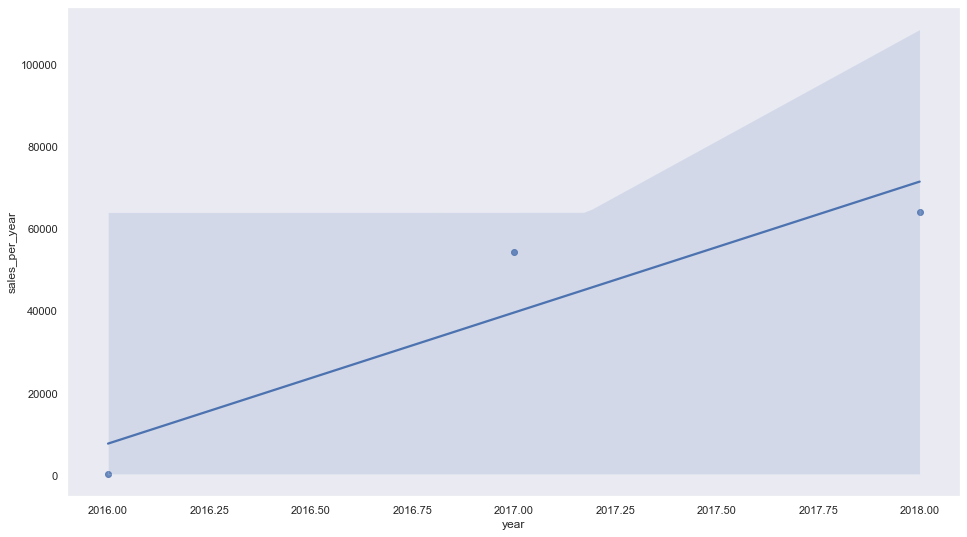

In [107]:
#Há tendÊncia?
sns.regplot(x = 'year', y ='sales_per_year', data = sales_per_year)

## **2.2 Sales per State**

In [13]:
df2_aux2 = df2[['order_approved_at', 'customer_state', 'year']].groupby(['customer_state', 'year']).count().reset_index().rename(columns={'order_approved_at': 'qtd_orders'})
df2_aux2.shape

(75, 3)

In [23]:
df2_aux2.sort_values(by='qtd_orders', ascending=False)
fig = px.bar(df2_aux2, x = 'year', y = 'qtd_orders', color = 'customer_state', title = 'Sales x Brazilian States')
fig.show()

## **2.3 Sales per City**

In [90]:
city_aux = df2[['year', 'customer_city', 'order_approved_at']].groupby(['year', 'customer_city']).count().reset_index().rename(columns={'order_approved_at': 'qtd_sales'}).sort_values(by='qtd_sales', ascending= False).head(338)
fig = px.line(city_aux, x = 'year', y = 'qtd_sales', color = 'customer_city', title = 'Sales x Brazilian City', markers=True)
fig.show()

## **2.4 Status per state**

In [88]:
aux = df2[['order_status', 'year', 'customer_state']].groupby(['year', 'order_status']).count().reset_index()
fig = px.bar(aux, x = 'year', y = 'customer_state', color = 'order_status', title = 'Order status')
fig.show()

## **2.5 Sales Delivered per Month**

In [17]:
#Selecting data
aux25 = df2.loc[df2['order_status'] == 'delivered', :]
aux251 = aux25[['order_status', 'customer_unique_id', 'month']].groupby(['order_status', 'month']).count().reset_index().rename(columns={'customer_unique_id': 'qtd_status'})

fig = px.bar(aux251, x = 'month', y = 'qtd_status', title = 'Order status')
fig.show()





## **2.7 Sales Canceled per Month**

In [18]:
#Selecting data
aux26= df2.loc[df2['order_status'] == 'canceled', :]
aux261 = aux26[['order_status', 'customer_unique_id', 'month']].groupby(['order_status', 'month']).count().reset_index().rename(columns={'customer_unique_id': 'qtd_status'})

fig = px.bar(aux261, x = 'month', y = 'qtd_status', title = 'Order Canceled')
fig.show()




## **Correlation**

In [27]:
df2.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'order_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_id',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'year',
       'month', 'hour', 'week', 'dayofweek'],
      dtype='object')

<AxesSubplot:>

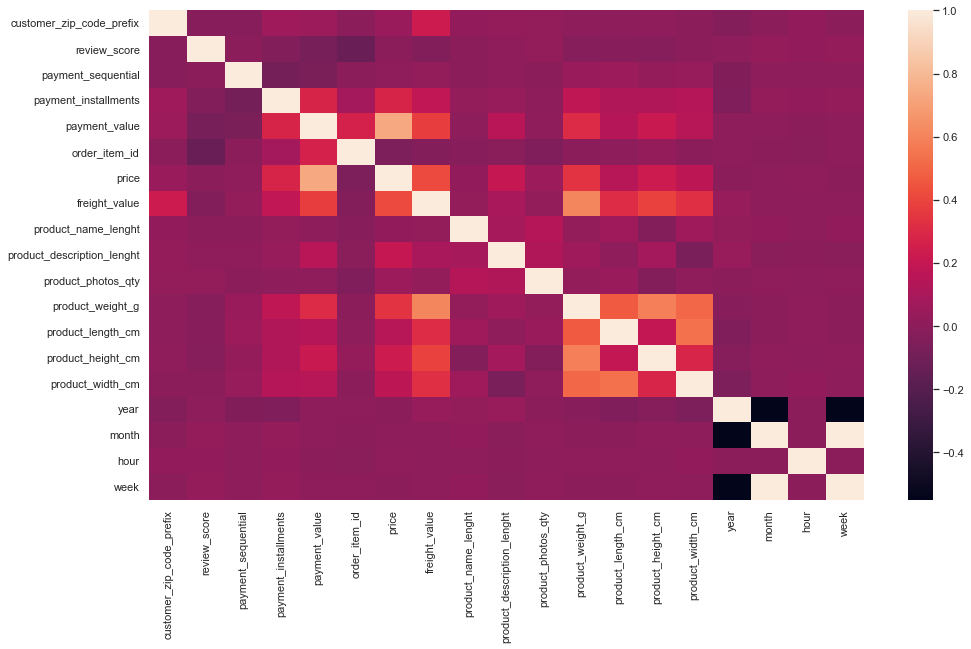

In [49]:
corr = df2.corr()
sns.heatmap(corr)    

## **2.8 Orders**

### **2.8.1 Volume per payment type**

In [65]:
df2_aux1 = df2[['payment_type', 'payment_value']].groupby('payment_type').sum().reset_index()
fig = px.bar(df2_aux1, x = 'payment_type', y = 'payment_value', color= 'payment_type', title = 'Payment value per payment type')
fig.show()

## **2.8.2 payment_installments analysis with review_score**

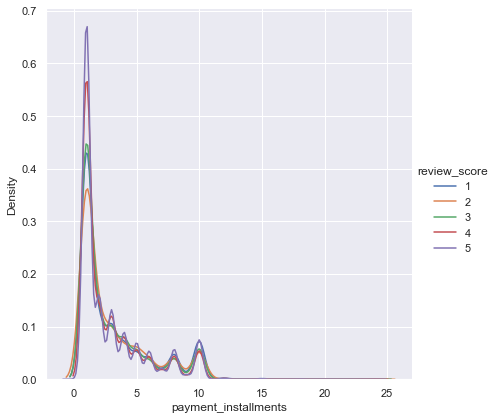

In [68]:
#plotting density plot of installments wrt each ratings
sns.FacetGrid(df2,hue="review_score",height=6).map(sns.kdeplot,"payment_installments").add_legend()
plt.show()

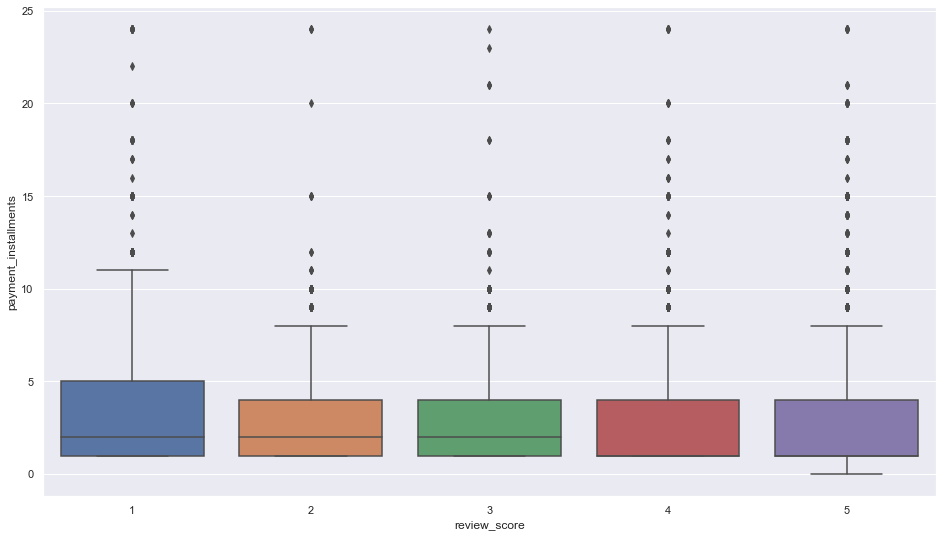

In [69]:
sns.boxplot(y="payment_installments",x="review_score",data=df2)
plt.show()

In [91]:
df282_aux = df2[['order_id', 'year']].groupby('year').count().reset_index()
cols = ['year', 'order_id1', 'order_id2', 'order_id3', 'order_id4']
df282_aux.columns = cols
df282_aux.drop(columns=['order_id2', 'order_id3', 'order_id4'], inplace= True  )
fig = px.line(df282_aux, x = 'year', y = 'order_id1', title= 'Orders evolution')
fig.show()

## **2.6 Price Distribution**

c:\Users\victo\Music\Projetos\capaticao_limfie\codigo\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



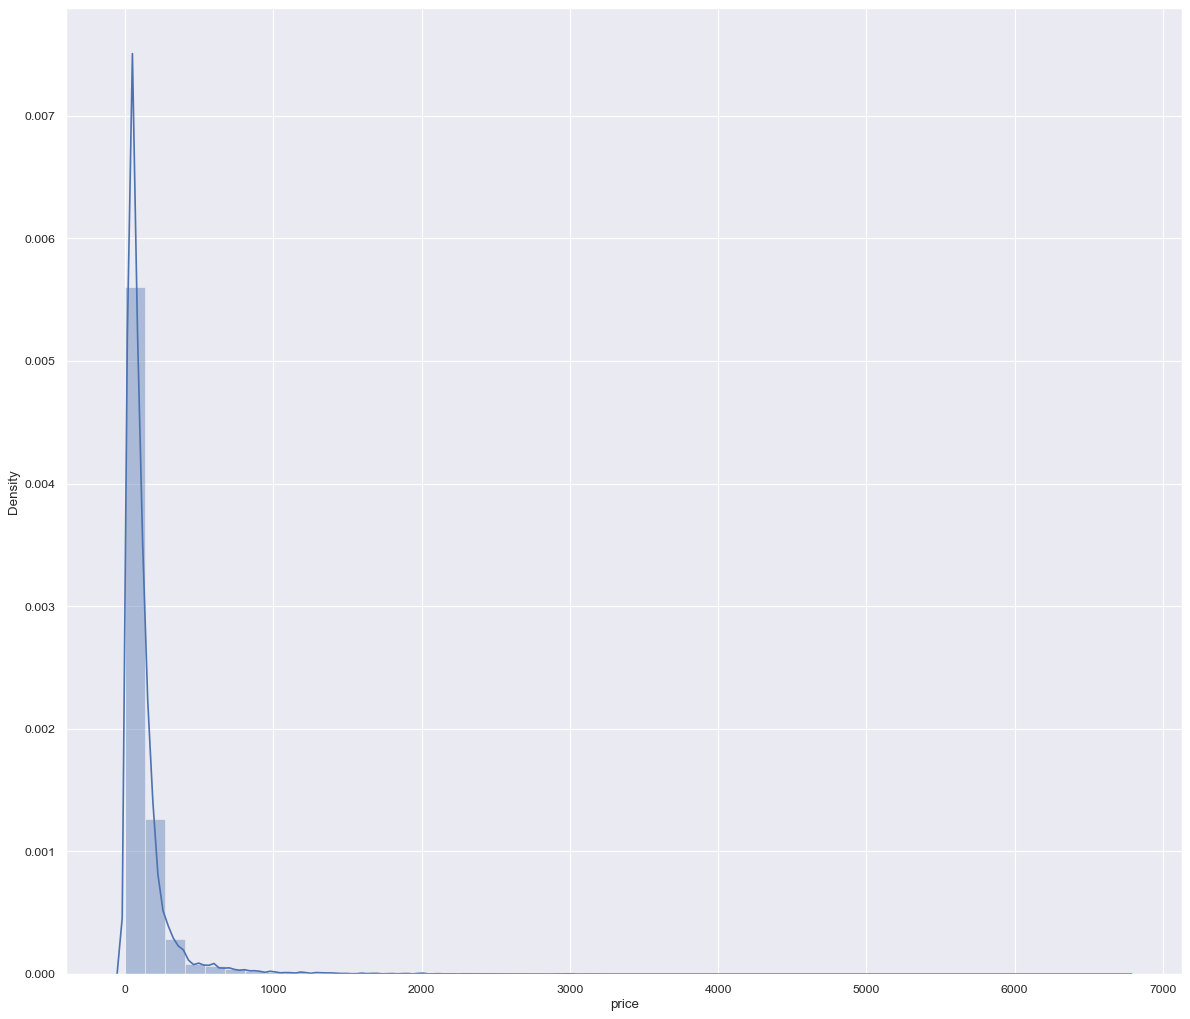

In [93]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.distplot(df2['price']);
sns.set_style("dark")

c:\Users\victo\Music\Projetos\capaticao_limfie\codigo\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='payment_installments', ylabel='price'>

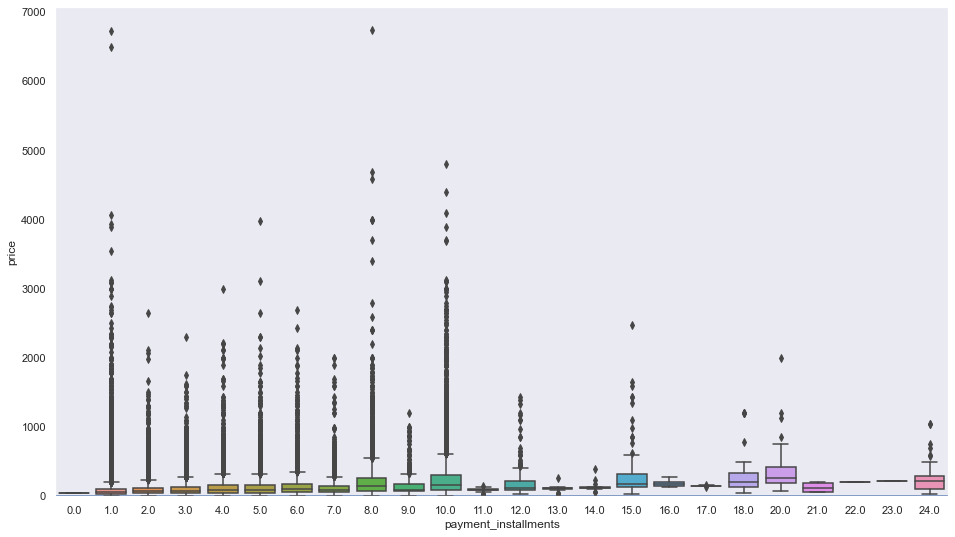

In [117]:
#Produtos mais baratos são menos parcelados?
sns.distplot(aux['price']);
sns.set_style("dark")
sns.boxplot(x = 'payment_installments', y = 'price', data = df2)


c:\Users\victo\Music\Projetos\capaticao_limfie\codigo\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='product_category_name', ylabel='price'>

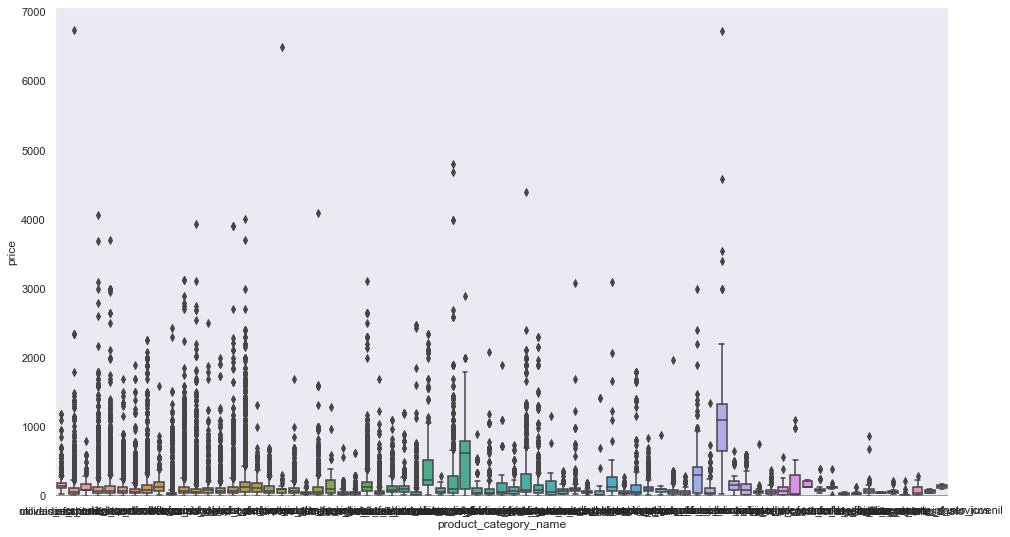

In [118]:
sns.distplot(aux['price']);
sns.set_style("dark")
sns.boxplot(x = 'product_category_name', y = 'price', data = df2)

## **2.7 Geolocation**

In [209]:
location_qry = """
select *
from geolocation
"""

#new query
df_geo = pd.read_sql(location_qry, conn)
df_geo.head()
#df_geo = go.Scattergeo(locations=['Brazil'], locationmode='country names', lon=df2['geolocation_lng'], lat= df2['geolocation_lat'], text= df2['geolocation_city'] )

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year,month,hour,week,dayofweek
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,8683.0,54.0,64.0,31.0,2017,5,15,20,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,3.0,10150.0,89.0,15.0,40.0,2018,1,20,2,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,8267.0,52.0,52.0,17.0,2018,5,16,20,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,12160.0,56.0,51.0,28.0,2018,3,16,11,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,5200.0,45.0,15.0,35.0,2018,7,9,30,Sunday
